<a href="https://colab.research.google.com/github/amannain122/Health-Project-ML-Group-C/blob/main/Machine_Learning_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [3]:
rawHealthCareDF = pd.read_csv('/content/HealthCareDataSet - Sheet1.csv',index_col=0)
X_train, X_test=train_test_split(rawHealthCareDF,test_size=0.2,random_state=24)
X_train.to_csv("healthCare_train_dataset")
X_test.to_csv("healthCare_test_dataset")

In [4]:
healthCareDF=pd.read_csv("/content/healthCare_train_dataset",index_col=0)

In [5]:
healthCareDF.head(5)

,LengthOfStay,ReadmissionCount,Gender,FacilityId,KidneyAilments,HeartAilments,PyschologicalAilments,SubstanceAbuseHistory,BMI,ABG,Pulse,SecondaryDiagnosis
Id,,,,,,,,,,,,
13564860887,1,NaN,M,2051,NaN,NaN,False,Yes,27.7,141.0,66.0,1.0
13564857808,7,NaN,M,8161,NaN,NaN,False,None,27.3,174.0,82.0,4.0
13564864392,2,NaN,M,7617,NaN,NaN,False,Yes,29.9,159.0,41.0,1.0
13564864858,4,3.0,M,729,NaN,NaN,False,None,27.4,102.0,56.0,1.0
13564863709,4,2.0,M,9943,NaN,NaN,False,None,27.2,116.0,103.0,1.0


In [6]:
healthCareDF.tail(5)

,LengthOfStay,ReadmissionCount,Gender,FacilityId,KidneyAilments,HeartAilments,PyschologicalAilments,SubstanceAbuseHistory,BMI,ABG,Pulse,SecondaryDiagnosis
Id,,,,,,,,,,,,
13564861663,5,NaN,M,4247,NaN,NaN,False,None,31.3,126.0,80.0,4.0
13564866799,3,1.0,M,7713,NaN,NaN,False,None,29.3,103.0,73.0,2.0
13564859887,1,NaN,F,7822,NaN,NaN,False,None,27.2,122.0,62.0,2.0
13564864949,3,1.0,F,2150,NaN,NaN,False,None,27.3,106.0,48.0,3.0
13564857313,1,NaN,F,9432,NaN,NaN,False,None,31.2,145.0,66.0,1.0


In [7]:
healthCareDF.shape

(8799, 12)

In [8]:
healthCareDF.describe(include='all')

,LengthOfStay,ReadmissionCount,Gender,FacilityId,KidneyAilments,HeartAilments,PyschologicalAilments,SubstanceAbuseHistory,BMI,ABG,Pulse,SecondaryDiagnosis
count,8799.000000,4325.000000,8799,8799.000000,0.0,0.0,8799,8493,8797.000000,8799.000000,8797.000000,8621.000000
unique,NaN,NaN,2,NaN,NaN,NaN,2,6,NaN,NaN,NaN,NaN
top,NaN,NaN,F,NaN,NaN,NaN,False,None,NaN,NaN,NaN,NaN
freq,NaN,NaN,4811,NaN,NaN,NaN,8307,7276,NaN,NaN,NaN,NaN
mean,4.550858,1.875838,NaN,4969.273781,NaN,NaN,NaN,NaN,29.057031,142.736208,77.919291,2.454124
std,3.280287,1.093282,NaN,2878.329483,NaN,NaN,NaN,NaN,2.005192,30.167172,18.119207,1.778419
min,1.000000,1.000000,NaN,2.000000,NaN,NaN,NaN,NaN,19.800000,-1.010000,17.000000,0.000000
25%,2.000000,1.000000,NaN,2511.000000,NaN,NaN,NaN,NaN,27.700000,123.000000,66.000000,1.000000
50%,4.000000,2.000000,NaN,4970.000000,NaN,NaN,NaN,NaN,29.000000,143.000000,78.000000,2.000000
75%,6.000000,2.000000,NaN,7453.500000,NaN,NaN,NaN,NaN,30.400000,163.000000,90.000000,3.000000


In [9]:

healthCareDF.count()

LengthOfStay             8799
ReadmissionCount         4325
Gender                   8799
FacilityId               8799
KidneyAilments              0
HeartAilments               0
PyschologicalAilments    8799
SubstanceAbuseHistory    8493
BMI                      8797
ABG                      8799
Pulse                    8797
SecondaryDiagnosis       8621
dtype: int64

In [10]:
healthCareDF.isnull().sum()

LengthOfStay                0
ReadmissionCount         4474
Gender                      0
FacilityId                  0
KidneyAilments           8799
HeartAilments            8799
PyschologicalAilments       0
SubstanceAbuseHistory     306
BMI                         2
ABG                         0
Pulse                       2
SecondaryDiagnosis        178
dtype: int64

In [11]:
healthCareDF.dropna(how='all', axis=1, inplace=True)

In [12]:
mean_RMCOunt=healthCareDF["ReadmissionCount"].mean().round()
mean_SecDiagno=healthCareDF["SecondaryDiagnosis"].mean().round()
healthCareDF["ReadmissionCount"].fillna(mean_RMCOunt,inplace=True)
healthCareDF["SecondaryDiagnosis"].fillna(mean_SecDiagno,inplace=True)


In [13]:

healthCareDF["SubstanceAbuseHistory"].fillna('Unknown',inplace=True)
healthCareDF.dropna(axis=0,inplace=True)
healthCareDF.isnull().sum()

LengthOfStay             0
ReadmissionCount         0
Gender                   0
FacilityId               0
PyschologicalAilments    0
SubstanceAbuseHistory    0
BMI                      0
ABG                      0
Pulse                    0
SecondaryDiagnosis       0
dtype: int64

In [14]:
healthCareDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8797 entries, 13564860887 to 13564857313
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   LengthOfStay           8797 non-null   int64  
 1   ReadmissionCount       8797 non-null   float64
 2   Gender                 8797 non-null   object 
 3   FacilityId             8797 non-null   int64  
 4   PyschologicalAilments  8797 non-null   bool   
 5   SubstanceAbuseHistory  8797 non-null   object 
 6   BMI                    8797 non-null   float64
 7   ABG                    8797 non-null   float64
 8   Pulse                  8797 non-null   float64
 9   SecondaryDiagnosis     8797 non-null   float64
dtypes: bool(1), float64(5), int64(2), object(2)
memory usage: 695.9+ KB


In [15]:
numerical_data_hcare=healthCareDF[['LengthOfStay', 'ReadmissionCount', 'FacilityId', 'BMI', 'ABG', 'Pulse',
       'SecondaryDiagnosis']]
correl=numerical_data_hcare.corr(method="pearson")

<Axes: >

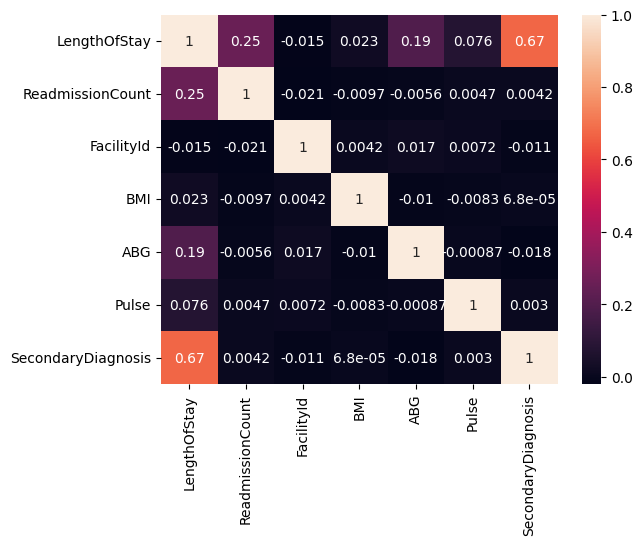

In [16]:
sns.heatmap(correl,annot=True)

In [17]:
healthCareDF['Gender'].replace("M",0,inplace=True)
healthCareDF['Gender'].replace("F",1,inplace=True)
healthCareDF['PyschologicalAilments'].replace(False,0,inplace=True)
healthCareDF['PyschologicalAilments'].replace(True,1,inplace=True)
healthCareDF.SubstanceAbuseHistory.describe(include='all')
healthCareDF['SubstanceAbuseHistory'].unique()

array(['Yes', 'None', 'Slight', 'Unknown', 'Some', 'Few'], dtype=object)

In [18]:
numerical_data_hcare=healthCareDF[['LengthOfStay', 'ReadmissionCount', 'Gender', 'FacilityId',
       'PyschologicalAilments', 'BMI', 'ABG', 'Pulse',
       'SecondaryDiagnosis']]
correl=numerical_data_hcare.corr(method="pearson").round(2)

<Axes: >

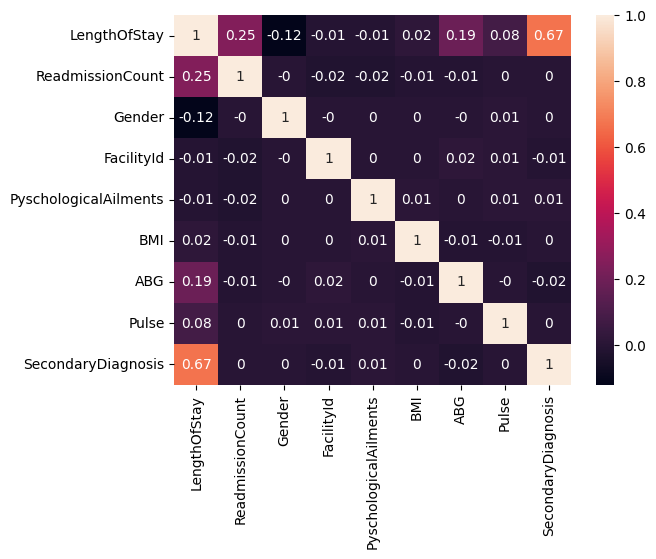

In [19]:
sns.heatmap(correl,annot=True)

In [20]:
encoder=OneHotEncoder()
categ_subs_abuse=encoder.fit_transform(healthCareDF[["SubstanceAbuseHistory"]])
newcateg= pd.DataFrame(categ_subs_abuse.toarray(), columns=encoder.get_feature_names_out(['SubstanceAbuseHistory']))
newcateg.index=healthCareDF.index
newcateg.head()

,SubstanceAbuseHistory_Few,SubstanceAbuseHistory_None,SubstanceAbuseHistory_Slight,SubstanceAbuseHistory_Some,SubstanceAbuseHistory_Unknown,SubstanceAbuseHistory_Yes
Id,,,,,,
13564860887,0.0,0.0,0.0,0.0,0.0,1.0
13564857808,0.0,1.0,0.0,0.0,0.0,0.0
13564864392,0.0,0.0,0.0,0.0,0.0,1.0
13564864858,0.0,1.0,0.0,0.0,0.0,0.0
13564863709,0.0,1.0,0.0,0.0,0.0,0.0


In [21]:
healthCareDF=healthCareDF.join(newcateg)

<ipython-input-22-a4eaa9e435a5>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  actual_correl=healthCareDF.corr(method='spearman').round(2)


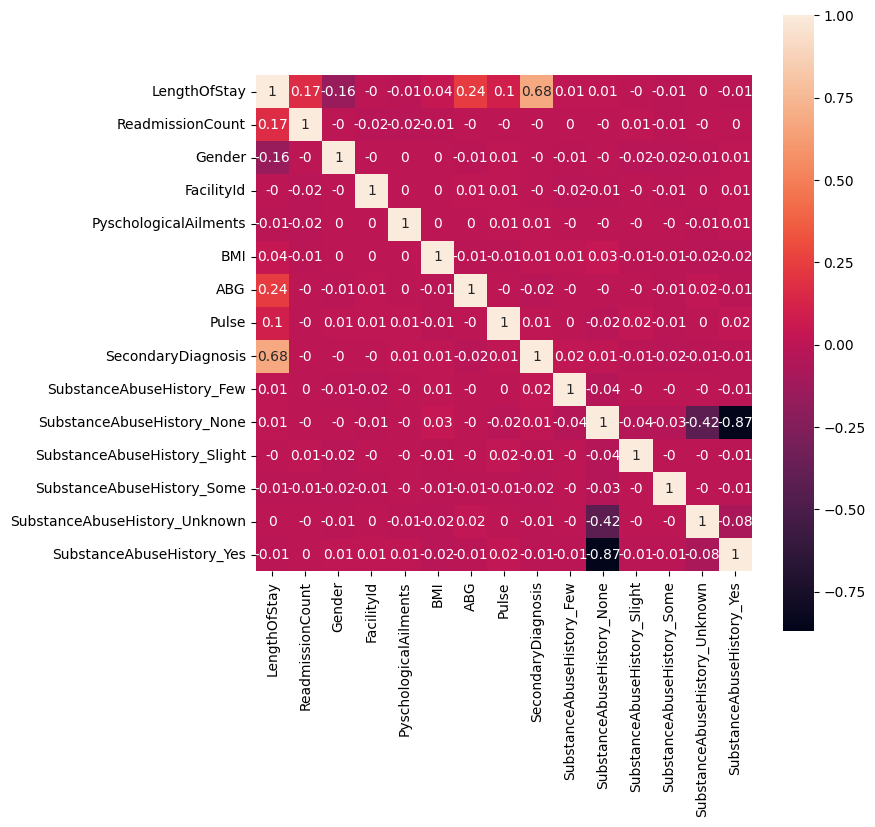

In [22]:
actual_correl=healthCareDF.corr(method='spearman').round(2)
plt.figure(figsize=(8,8))
sns.heatmap(actual_correl,annot=True,square=True)
plt.show()

In [27]:
def show_histogram(data_frame_cols):
  plt.figure(figsize=(6,6))
  sns.displot(data_frame_cols,bins='auto')
  plt.show()

<Figure size 600x600 with 0 Axes>

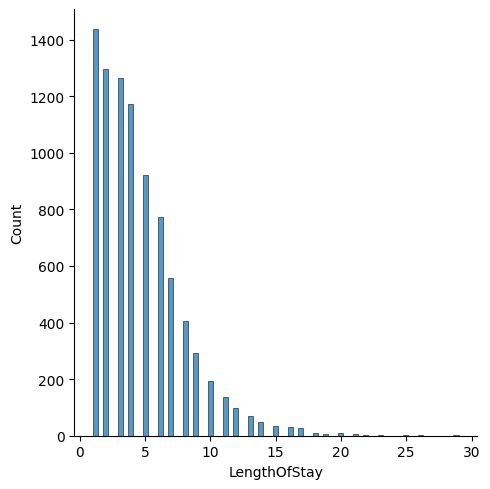

<Figure size 600x600 with 0 Axes>

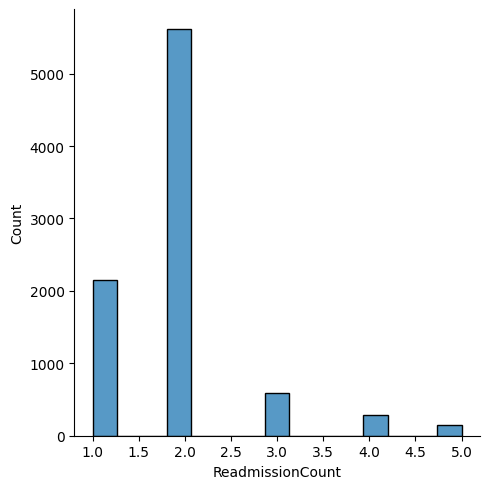

<Figure size 600x600 with 0 Axes>

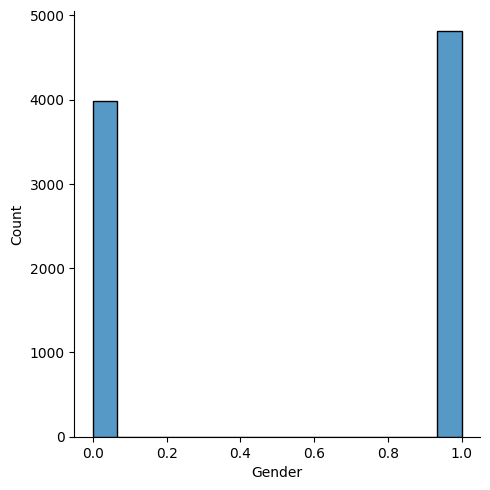

<Figure size 600x600 with 0 Axes>

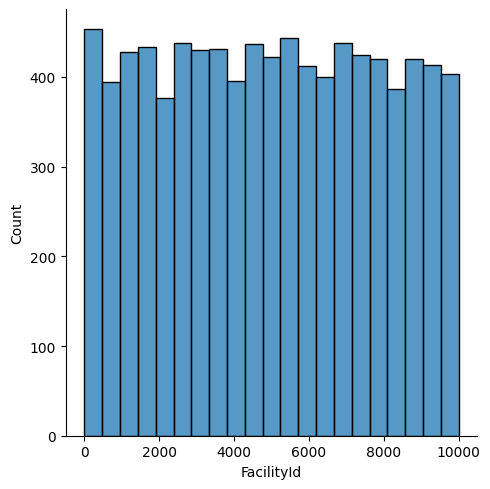

<Figure size 600x600 with 0 Axes>

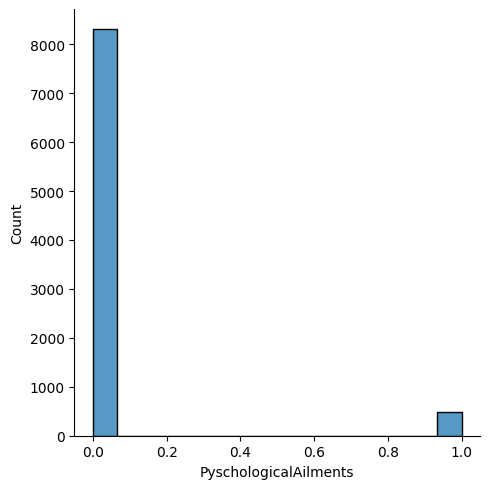

<Figure size 600x600 with 0 Axes>

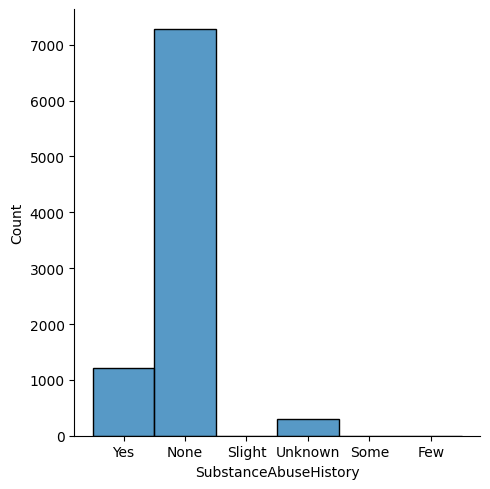

<Figure size 600x600 with 0 Axes>

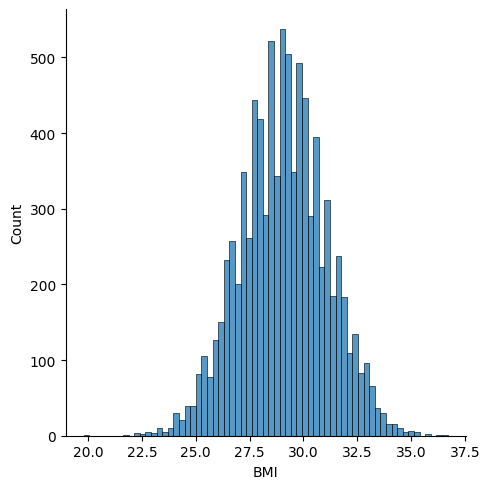

<Figure size 600x600 with 0 Axes>

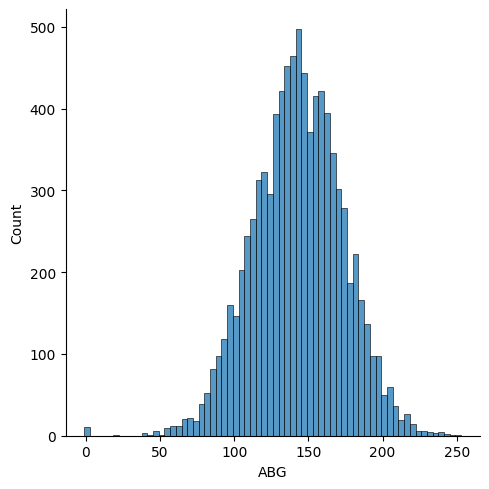

<Figure size 600x600 with 0 Axes>

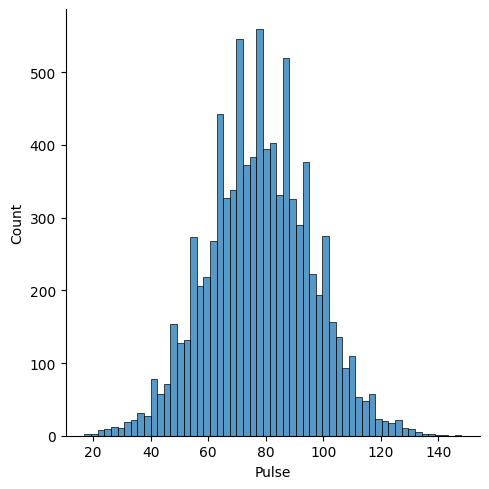

<Figure size 600x600 with 0 Axes>

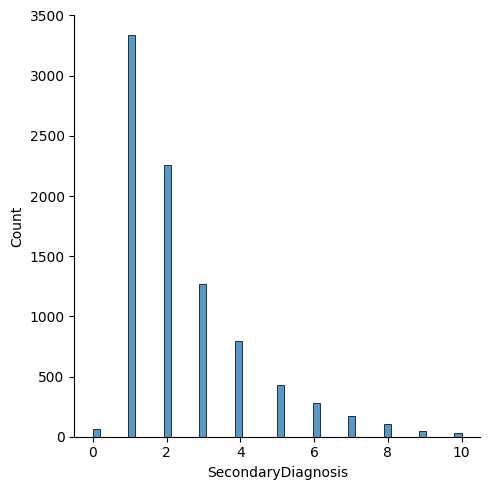

<Figure size 600x600 with 0 Axes>

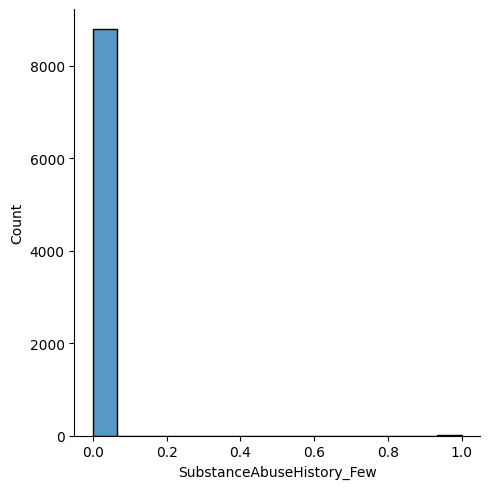

<Figure size 600x600 with 0 Axes>

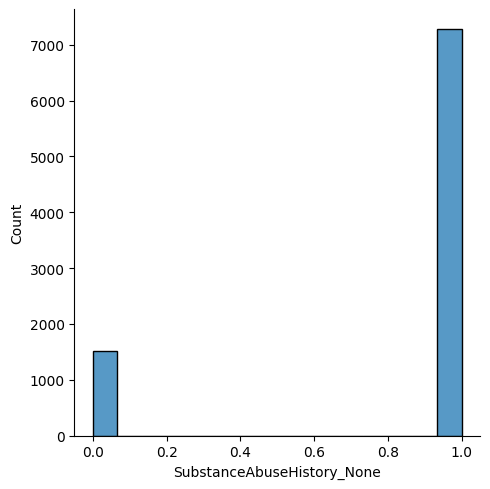

<Figure size 600x600 with 0 Axes>

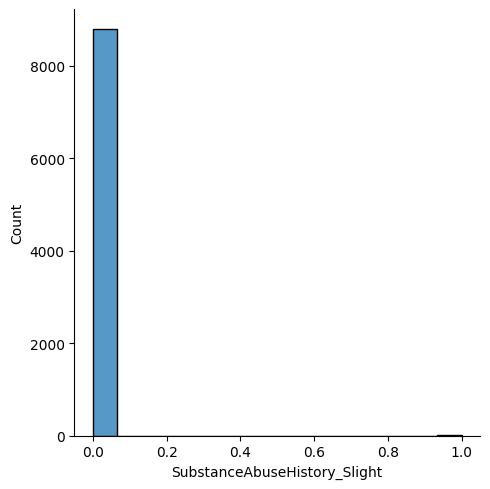

<Figure size 600x600 with 0 Axes>

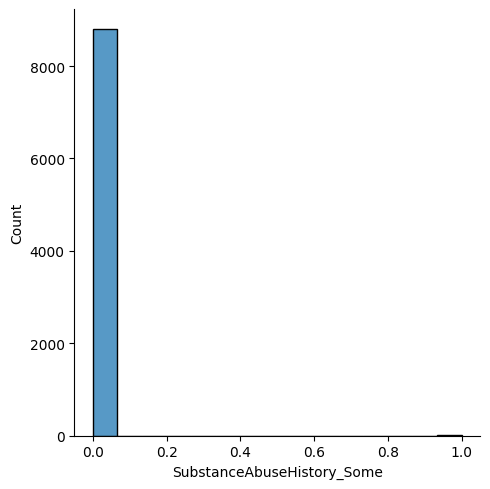

<Figure size 600x600 with 0 Axes>

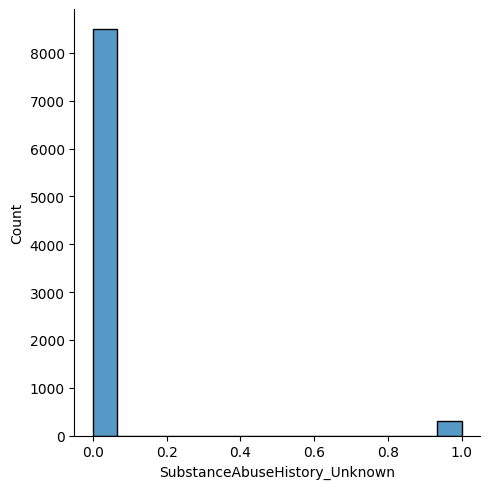

<Figure size 600x600 with 0 Axes>

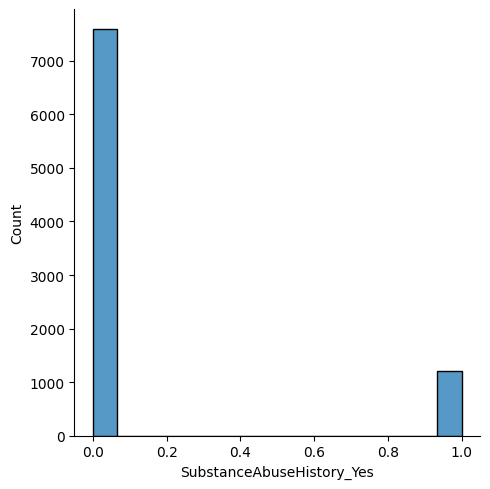

In [28]:
for column in healthCareDF.columns:
  show_histogram(healthCareDF[column])

In [50]:
def show_scatterplot(data_frame_cols):
  plt.figure(figsize = (6,6))
  sns.scatterplot(data= healthCareDF, x= data_frame_cols, y = healthCareDF.LengthOfStay)
  plt.show()

In [ ]:
#features
features = ['ReadmissionCount', 'Gender', 'ABG' ,'SecondaryDiagnosis', 'Pulse','BMI']
for column in features:
  show_scatterplot(healthCareDF[column])

In [29]:
def show_scatterplot(data_frame_cols):
  plt.figure(figsize = (6,6))
  sns.scatterplot(data= healthCareDF, x= data_frame_cols, y = healthCareDF.LengthOfStay)
  plt.show()